# Math 157 Final Project: Formula 1 Standings Predictions using Regression

## Jay Shinde, May 2022

<img src="formula-1-logo-2-2.png" alt="Drawing" style="width: 200px;"/>
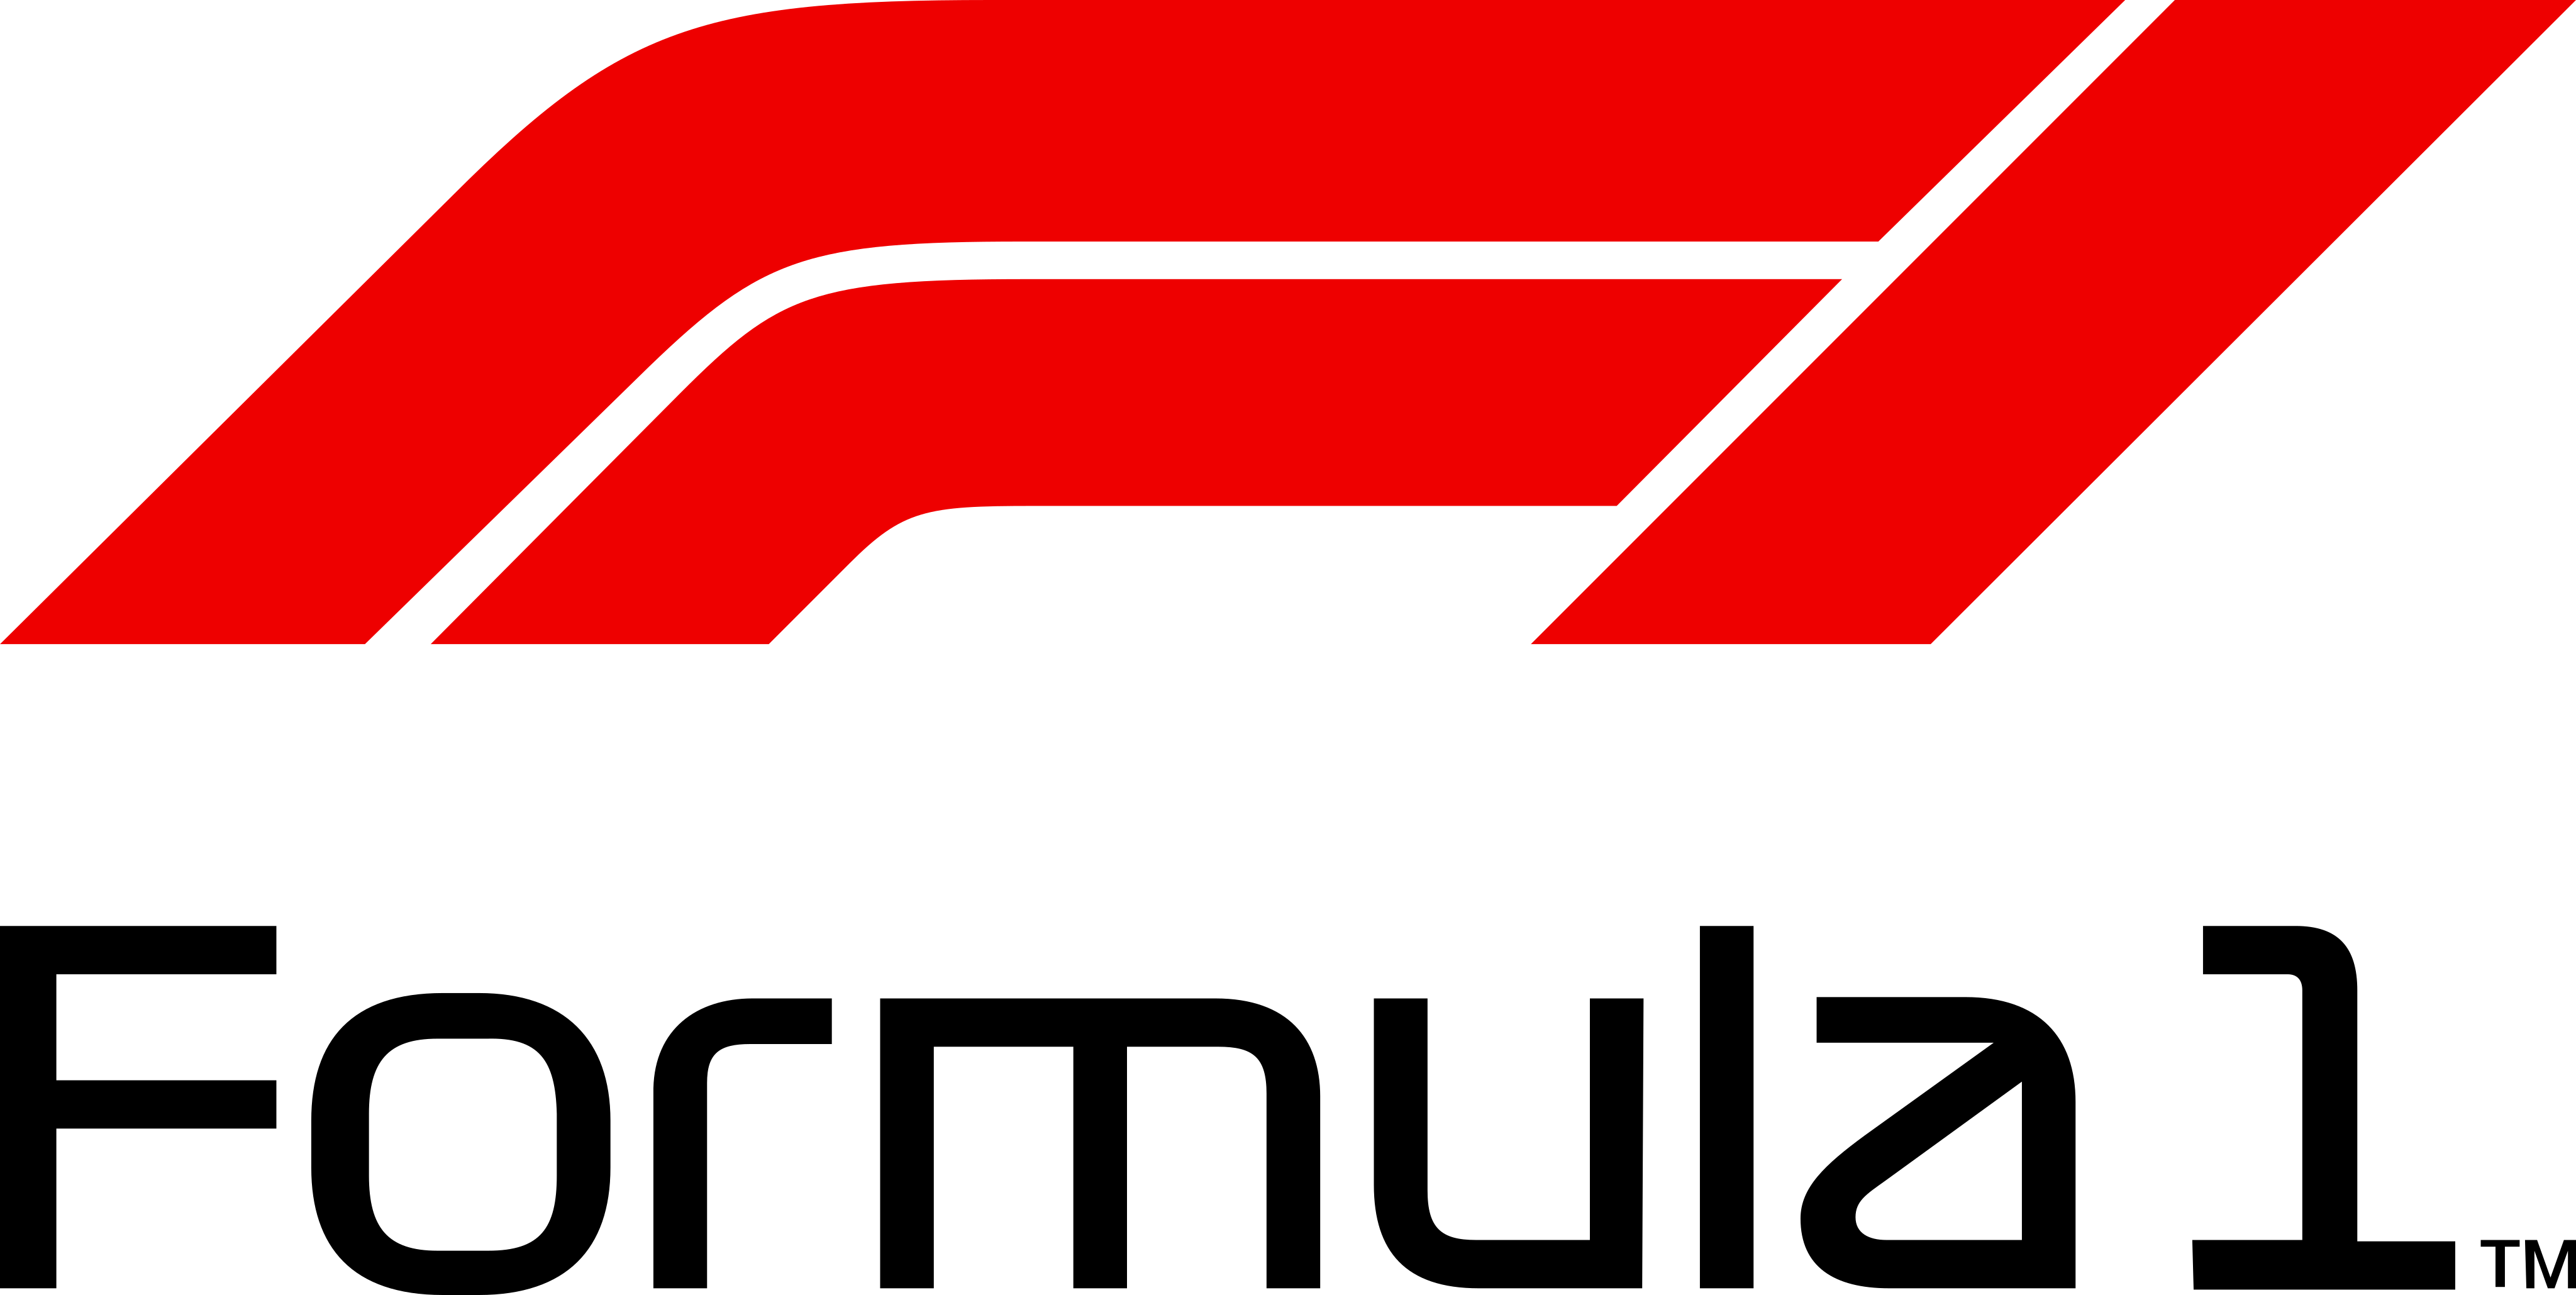
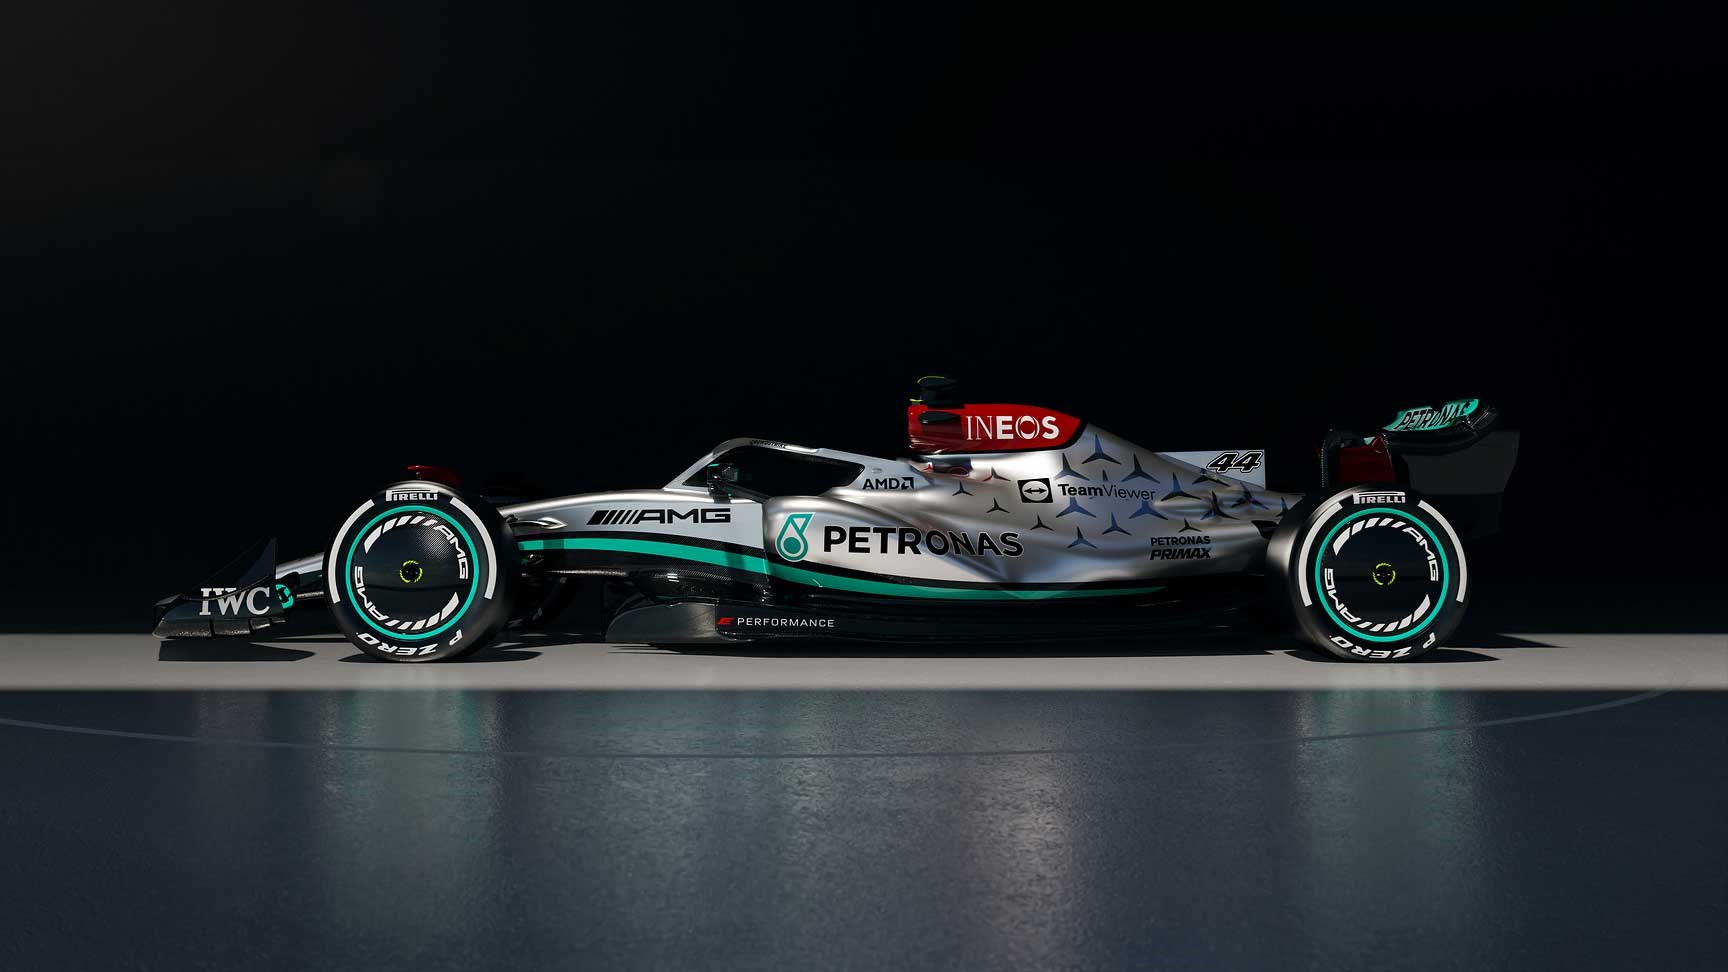

## What is it?

The Annual Formula 1 Championship is the world's most watched racing championship with over 1,550,000,000 cumulative TV viewers for the 2021 Championship. Each Championship consists of a series of Grand Prix taking place at infamous racing tracks worldwide from the Belgium Grand Prix at Spa-Francorchamps to the Monaco Grand Prix in Italy. There are currently 10 Racing Teams in Formula 1 with each team having two drivers. Each Team is responsible for making a competitive race car through extensive research and testing pre-season and during season. The more recent Formula 1 cars can push close to 200 miles per hour with the drivers subject to over 6Gs (6 times the force of gravity) while cornering due to the cars' extreme grip.

Below is the newly designed 2022 Mercedes-AMG Petronas W13 Formula 1 Car driven by 7-time World Champion Lewis Hamilton.

<img src="w13_1.jpeg" alt="Drawing" style="width: 500px;"/>

## Formula 1 Datasets

I'm introducing three key datasets that will allow insight into underlying trends that we could apply into predictions. It's important to note that we might see hints of bias.

AllRace.csv is a Dataset that contains data on every Formula 1 Race starting from May 1950 to August 2020 providing the Grand Prix location, date, and standings of the drivers who participated in the GP.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

race_data = pd.read_csv("AllRace.csv")
race_data.head()

,Unnamed: 0,Date,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
0,Great Britain,13-May-50,Nino Farina FAR,Luigi Fagioli FAG,Reg Parnell PAR,Yves Giraud Cabantous CAB,Louis Rosier ROS,Bob Gerard GER,Cuth Harrison HAR,Philippe Etancelin ETA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Monaco,21-May-50,Juan Manuel Fangio FAN,Alberto Ascari ASC,Louis Chiron CHI,Raymond Sommer SOM,Prince Bira BIR,Bob Gerard GER,Johnny Claes CLA,Luigi Villoresi VIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indianapolis 500,30-May-50,Johnnie Parsons PAR,Bill Holland HOL,Mauri Rose ROS,Cecil Green GRE,Joie Chitwood CHI,Tony Bettenhausen BET,Lee Wallard WAL,Walt Faulkner FAU,...,Henry Banks BAN,Fred Agabashian AGA,Bill Schindler SCH,Bayliss Levrett LEV,Bill Cantrell CAN,Jimmy Jackson JAC,Sam Hanks HAN,Dick Rathmann RAT,Duke Dinsmore DIN,NaN
3,Switzerland,04-Jun-50,Nino Farina FAR,Luigi Fagioli FAG,Louis Rosier ROS,Prince Bira BIR,Felice Bonetto BON,Toulo de Graffenried DEG,Nello Pagani PAG,Harry Schell SCH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belgium,18-Jun-50,Juan Manuel Fangio FAN,Luigi Fagioli FAG,Louis Rosier ROS,Nino Farina FAR,Alberto Ascari ASC,Luigi Villoresi VIL,Pierre Levegh LEV,Johnny Claes CLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ConstructorStandings.csv contains the Standings of each Team during each Racing Year. We can use this to see how team performance has evolved through the years.

In [2]:
team_data = pd.read_csv("ConstructorStandings.csv")
team_data.head()

,Unnamed: 0,Pos,Team,PTS,Year
0,0,1,Vanwall,48,1958
1,1,2,Ferrari,40,1958
2,2,3,Cooper Climax,31,1958
3,3,4,BRM,18,1958
4,4,5,Maserati,6,1958


DriverStandings.csv contains the standings of each driver for each Championship Year. We can use this to see some stats of the most notable drivers in F1 history and what teams they performed the best for.

In [3]:
driver_data = pd.read_csv("DriversStandings.csv")
driver_data.head()

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
0,0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950


### One Example of Bias in Championship Data

Prior to 2022, Lewis Hamilton and Valtteri Bottas raced together as teammates. Mercedes teammates Lewis Hamilton and Valtteri Bottas are not always racing against each other. If I compared the number of races where Hamilton has finished first to the number of races Valtteri Bottas has finished first, I would expect Lewis Hamilton to finish first more. However, there are many external factors that could lead to this result. Once again, this plays into the role of bias. 

During the 2017 Formula 1 Hungarian Grand Prix Valtterri Bottas was ordered to give up his position for his teammate Lewis Hamilton. Consequently, Bottas did regain his position and finished on the podium at 3rd place, while Hamilton placed 4th.

This example helps provide us a mental note to understand the standings of drivers are not completely representative of their capability.

Source:

https://www.nbcsports.com/video/valtteri-bottas-allows-lewis-hamilton-pass-him-hungarian-grand-prix

Lewis has won 89 Grand Prix

In [4]:
race_data['1'].value_counts()['Lewis Hamilton HAM']

89

Valtteri has won 8 Grand Prix

In [5]:
race_data['1'].value_counts()['Valtteri Bottas BOT']

8

Prior to 2021, Lewis Hamilton has finished P1 89 times, whereas Valtteri Bottas has finished P1 only 8 times. This data, along with the NBC Sports article gives us enough information to conclude that Valtterri Bottas is in fact a support driver for Lewis Hamilton. This suggests that if Valterri was not a support driver, the disparity between the two Mercedes Drivers 1st place finishes would be much less.

### Participation Check

Which driver has won the most Grand Prix?

In [6]:
race_data['1'].value_counts()

Michael Schumacher MSC     90
Lewis Hamilton HAM         89
Sebastian Vettel VET       53
Alain Prost PRO            51
Ayrton Senna SEN           41
                           ..
Ludovico Scarfiotti SCA     1
Richie Ginther GIN          1
Giancarlo Baghetti BAG      1
Innes Ireland IRE           1
Jim Rathmann RAT            1
Name: 1, Length: 108, dtype: int64

Michael Schumacher has won 90 Grand Prix during his Career!

#### Let's see if we can identify some more interesting information about these drivers.

In [7]:
race_data.describe()

,Unnamed: 0,Date,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
count,1025,1025,1023,1023,1023,1023,1023,1023,1023,1023,...,164,45,31,24,22,18,14,12,6,1
unique,1025,1025,108,149,185,206,237,268,299,301,...,111,42,31,23,20,17,13,12,6,1
top,Great Britain,13-May-50,Michael Schumacher MSC,Michael Schumacher MSC,Kimi RÃ¤ikkÃ¶nen RAI,Sebastian Vettel VET,Jenson Button BUT,Felipe Massa MAS,Sergio Perez PER,Jenson Button BUT,...,Johnny Herbert HER,Dave Kennedy KEN,Bill Schindler SCH,Robert Manzon MAN,Rodger Ward WAR,Johnny Boyd BOY,Len Sutton SUT,Dick Rathmann RAT,Duke Dinsmore DIN,Jimmy Reece REE
freq,1,1,90,42,45,32,27,27,24,20,...,5,3,1,2,2,2,2,1,1,1


Off the bat, we see Michael Schumacher as the most frequent Winner and Runner-Up out of all races. Additionally, we see that there were only 108 unique Winners of Formula 1 Championships. This becomes more interesting as we see the number of unique drivers increase as the finishing position decreases from 1st place.

#### Let's Compare the Performance of Mercedes Drivers Lewis Hamilton and Valtteri Bottas when they raced as teammates.

Let's see if we can identify the relationships between these drivers' performance and the number of races they've completed together.To do this, let's isolate the races where both Lewis Hamilton and Valtteri Bottas have raced together.

Drop columns that are irrelevant.

In [8]:
driver_positions = race_data.drop('Unnamed: 0', axis=1)
driver_positions = driver_positions.drop('Date', axis=1)

Select all races where Lewis and Valtteri have raced together.

In [9]:
merc_data = driver_positions[driver_positions.isin(['Lewis Hamilton HAM']).any(axis=1)]
merc_data = driver_positions[driver_positions.isin(['Valtteri Bottas BOT']).any(axis=1)]
merc_data

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
878,Kimi RÃ¤ikkÃ¶nen RAI,Fernando Alonso ALO,Sebastian Vettel VET,Felipe Massa MAS,Lewis Hamilton HAM,Mark Webber WEB,Adrian Sutil SUT,Paul di Resta DIR,Jenson Button BUT,Romain Grosjean GRO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879,Sebastian Vettel VET,Mark Webber WEB,Lewis Hamilton HAM,Nico Rosberg ROS,Felipe Massa MAS,Romain Grosjean GRO,Kimi RÃ¤ikkÃ¶nen RAI,Nico Hulkenberg HUL,Sergio Perez PER,Jean-Eric Vergne VER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,Fernando Alonso ALO,Kimi RÃ¤ikkÃ¶nen RAI,Lewis Hamilton HAM,Sebastian Vettel VET,Jenson Button BUT,Felipe Massa MAS,Daniel Ricciardo RIC,Paul di Resta DIR,Romain Grosjean GRO,Nico Hulkenberg HUL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
881,Sebastian Vettel VET,Kimi RÃ¤ikkÃ¶nen RAI,Romain Grosjean GRO,Paul di Resta DIR,Lewis Hamilton HAM,Sergio Perez PER,Mark Webber WEB,Fernando Alonso ALO,Nico Rosberg ROS,Jenson Button BUT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,Fernando Alonso ALO,Kimi RÃ¤ikkÃ¶nen RAI,Felipe Massa MAS,Sebastian Vettel VET,Mark Webber WEB,Nico Rosberg ROS,Paul di Resta DIR,Jenson Button BUT,Sergio Perez PER,Daniel Ricciardo RIC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,Lewis Hamilton HAM,Max Verstappen VER,Valtteri Bottas BOT,Lance Stroll STR,Alexander Albon ALB,Sebastian Vettel VET,Sergio Perez PER,Daniel Ricciardo RIC,Carlos Sainz SAI,Kevin Magnussen MAG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,Lewis Hamilton HAM,Max Verstappen VER,Charles Leclerc LEC,Daniel Ricciardo RIC,Lando Norris NOR,Esteban Ocon OCO,Pierre Gasly GAS,Alexander Albon ALB,Lance Stroll STR,Sebastian Vettel VET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,Max Verstappen VER,Lewis Hamilton HAM,Valtteri Bottas BOT,Charles Leclerc LEC,Alexander Albon ALB,Lance Stroll STR,Nico Hulkenberg HUL,Esteban Ocon OCO,Lando Norris NOR,Daniil Kvyat KVY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1023,Lewis Hamilton HAM,Max Verstappen VER,Valtteri Bottas BOT,Lance Stroll STR,Sergio Perez PER,Carlos Sainz SAI,Sebastian Vettel VET,Alexander Albon ALB,Pierre Gasly GAS,Lando Norris NOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Next, lets plot the performance of Lewis vs Valtteri over the course of their races together.

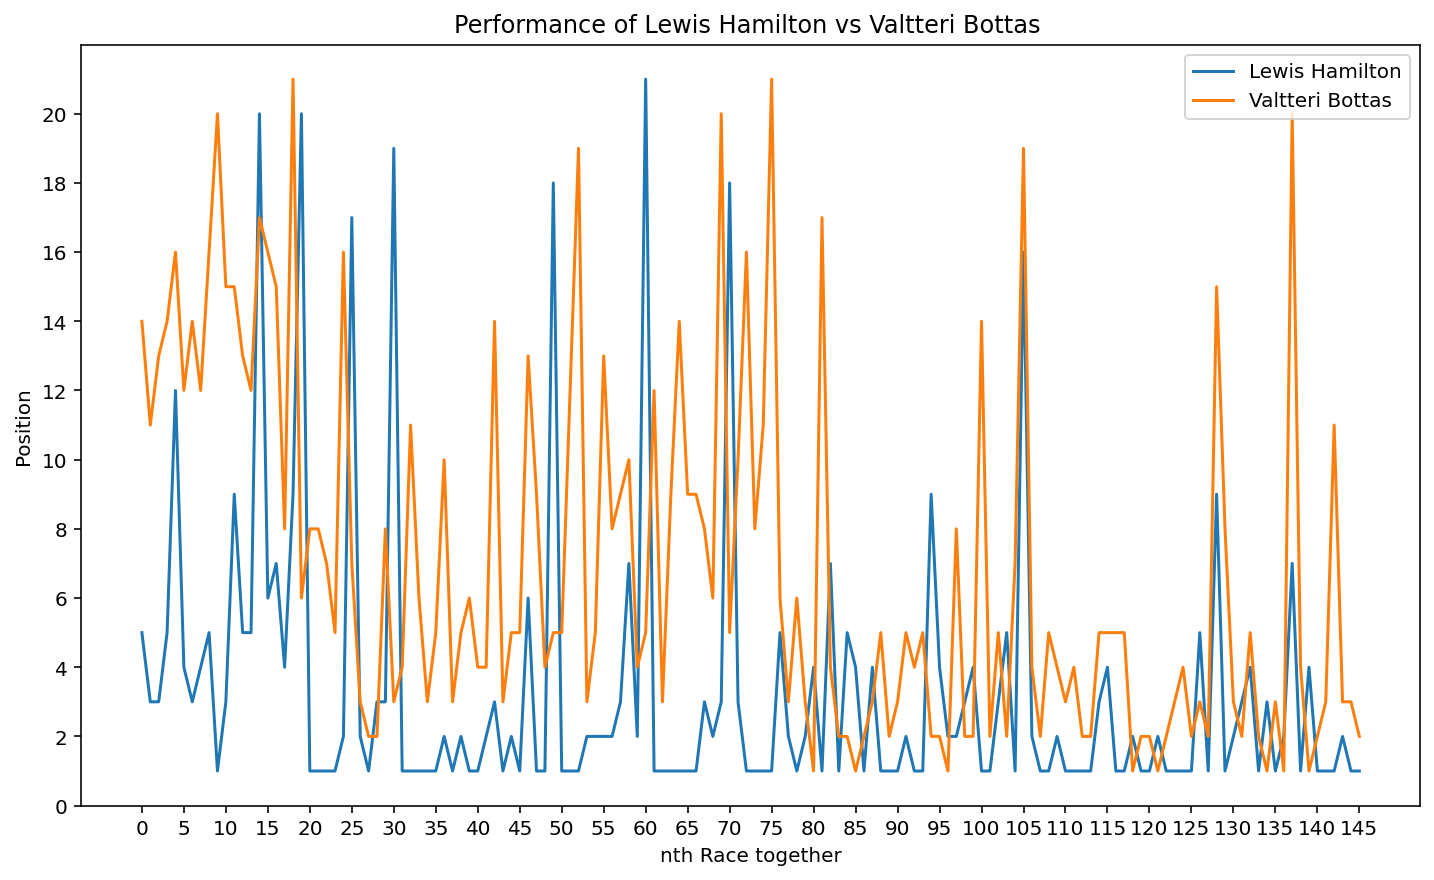

Lower the Position, the better..


In [10]:
ham = []
bot = []
race = []
for i in range(0,len(ham)):
    race.append(i)
for ind in merc_data.index:
    for col in merc_data.columns:
        if(merc_data.loc[ind].at[col] == 'Lewis Hamilton HAM'):
            ham.append(int(col))
        elif(merc_data.loc[ind].at[col] == 'Valtteri Bottas BOT'):
            bot.append(int(col))
for i in range(0,len(ham)):
    race.append(i)
plt.plot(race, ham, label = 'Lewis Hamilton')
plt.plot(race, bot, label = 'Valtteri Bottas')
plt.legend()
plt.yticks(np.arange(0, 21, 2))
plt.xticks(np.arange(0, 146, 5))
plt.xlabel('nth Race together')
plt.ylabel('Position')
plt.title('Performance of Lewis Hamilton vs Valtteri Bottas ')
plt.show()
print("Lower the Position, the better..")

#### This Plot looks a little overwhelming. Let's break it down a little.

Let's look at Lewis Hamilton specifically first.

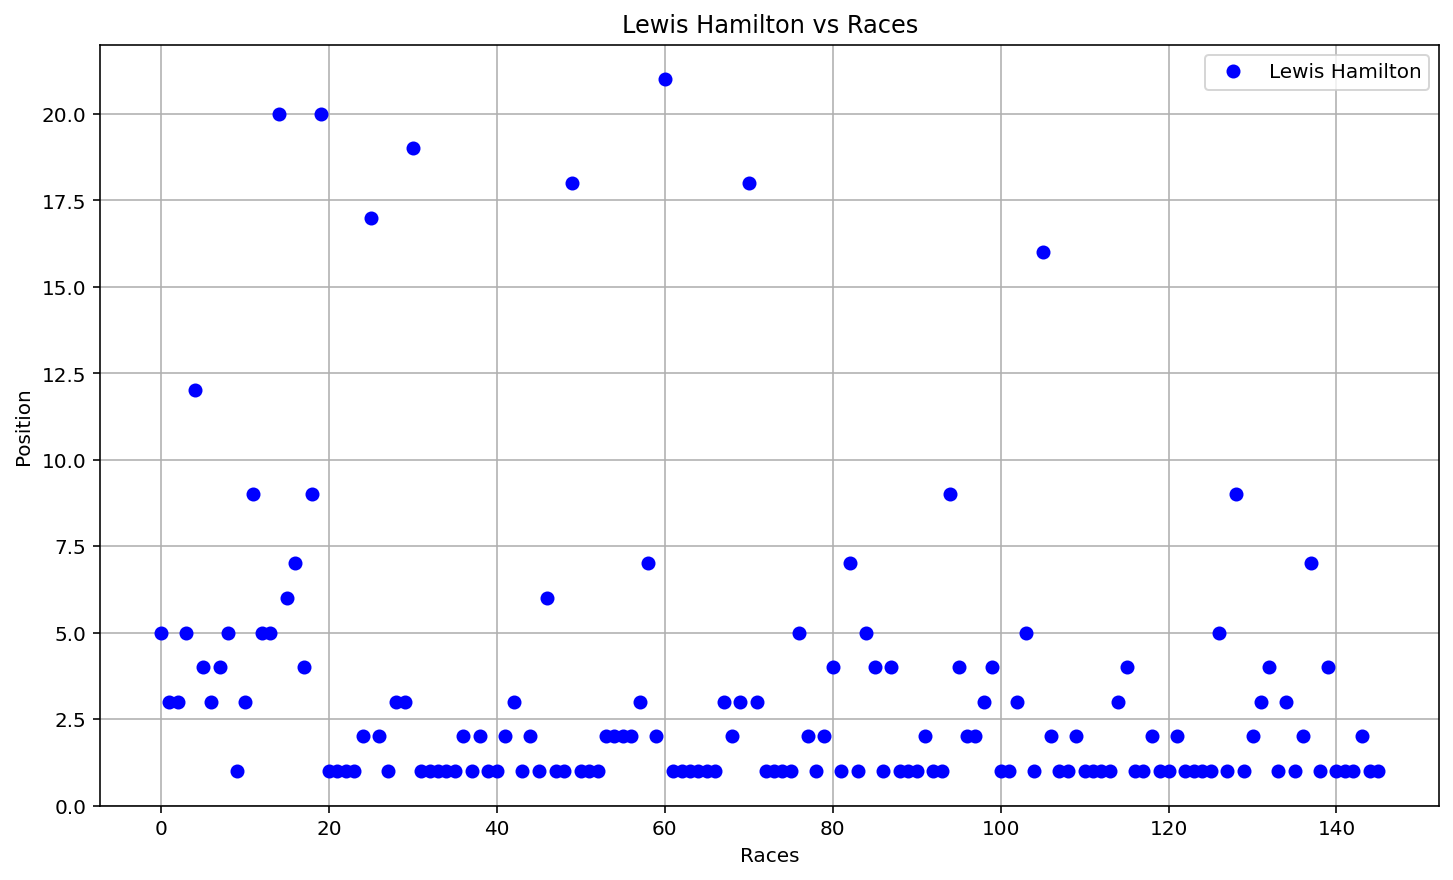

In [11]:
dfHAM = pd.DataFrame()
dfHAM['race'] = race
dfHAM['ham'] = ham
X = dfHAM['race'].values.reshape(-1,1)
y = dfHAM['ham'].values.reshape(-1,1)

plt.plot(X,y,'bo')
plt.ylabel('Position')
plt.xlabel('Races')
plt.legend(['Lewis Hamilton'])
plt.title('Lewis Hamilton vs Races')
plt.grid()
plt.show()

#### Let's Run a Linear Regression Model on Lewis Hamilton's data.

We can use this to identify performance changes in his consistency as one of the highest scoring drivers on the grid.

[5.79165713]
[[-0.03019339]]


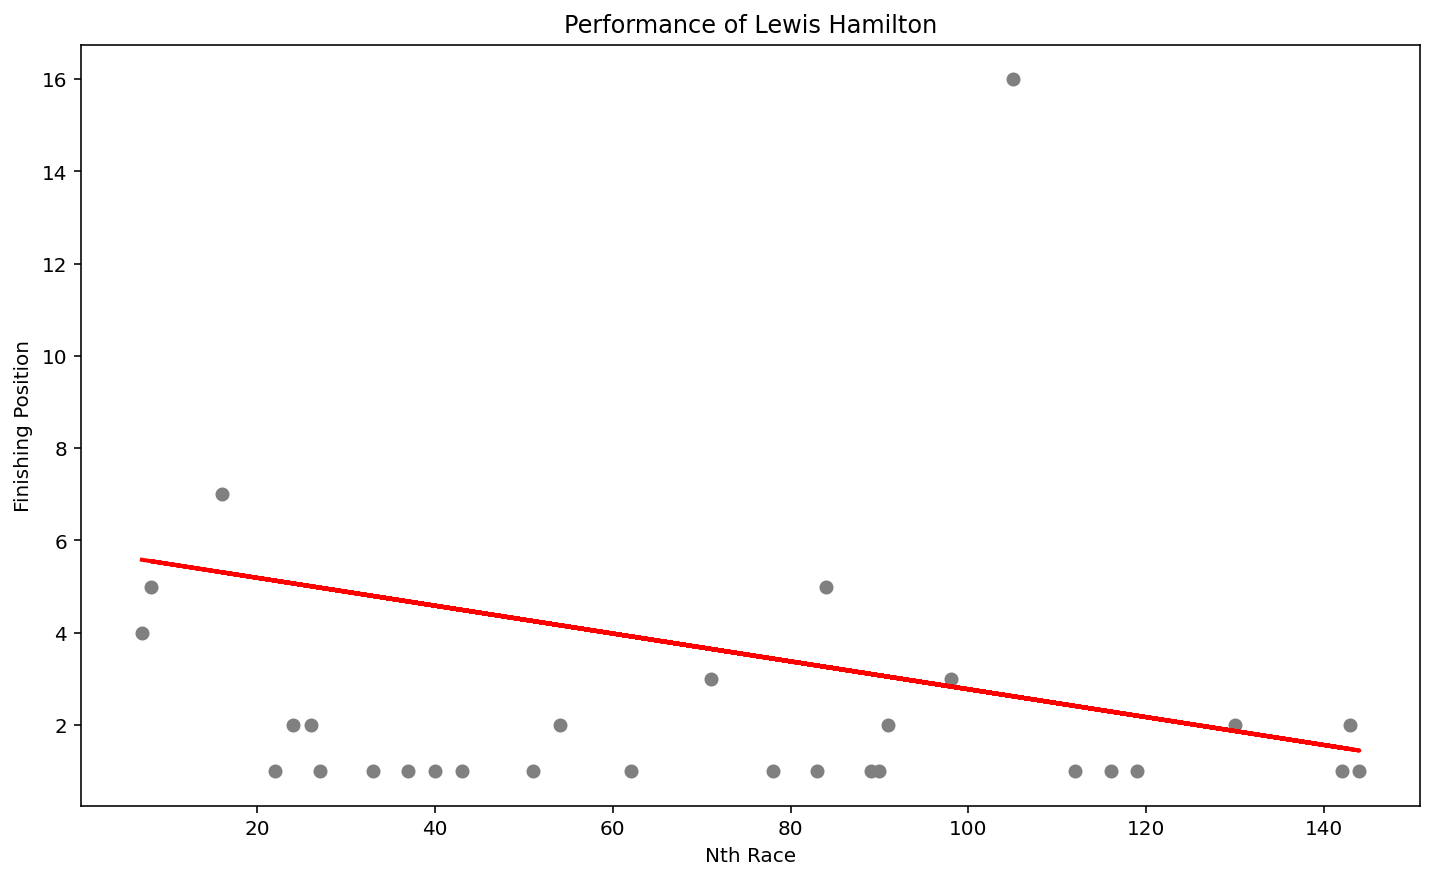

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #train

#intercept
print(regressor.intercept_)

#slope
print(regressor.coef_)

y_pred = regressor.predict(X_test)

dfHAMPred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Nth Race')
plt.ylabel('Finishing Position')
plt.title('Performance of Lewis Hamilton')
plt.show()

Having created a Linear Regressed Model, we see the line of best fit generated by the model.

$$(Finishing Position Hamilton) = -0.03019339(Nth Race) + 5.79165713$$

#### Let's do the same Linear Regression on Valtteri Bottas' Data

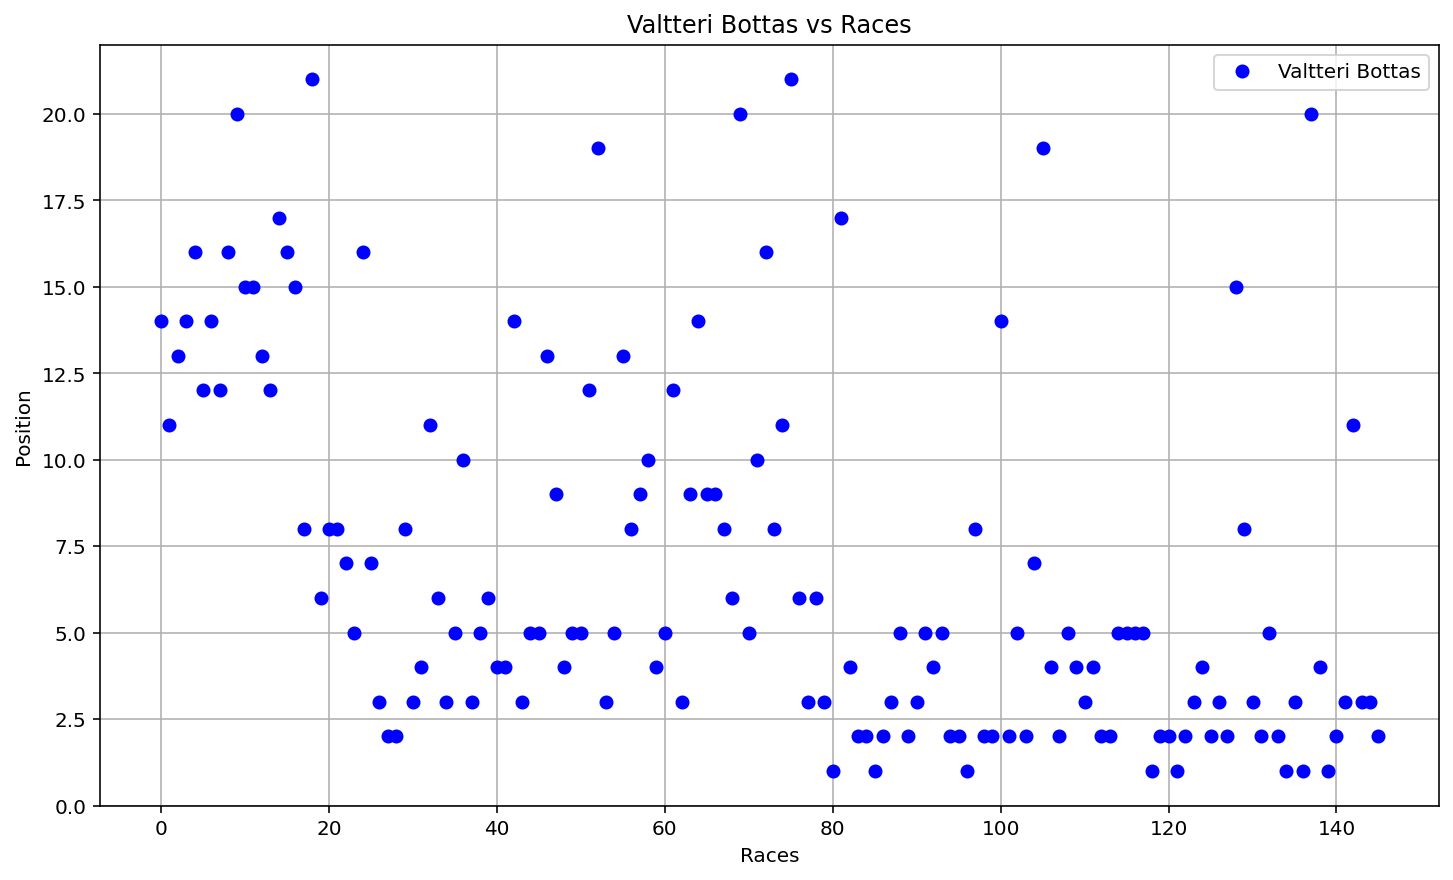

[12.02118485]
[[-0.06664188]]


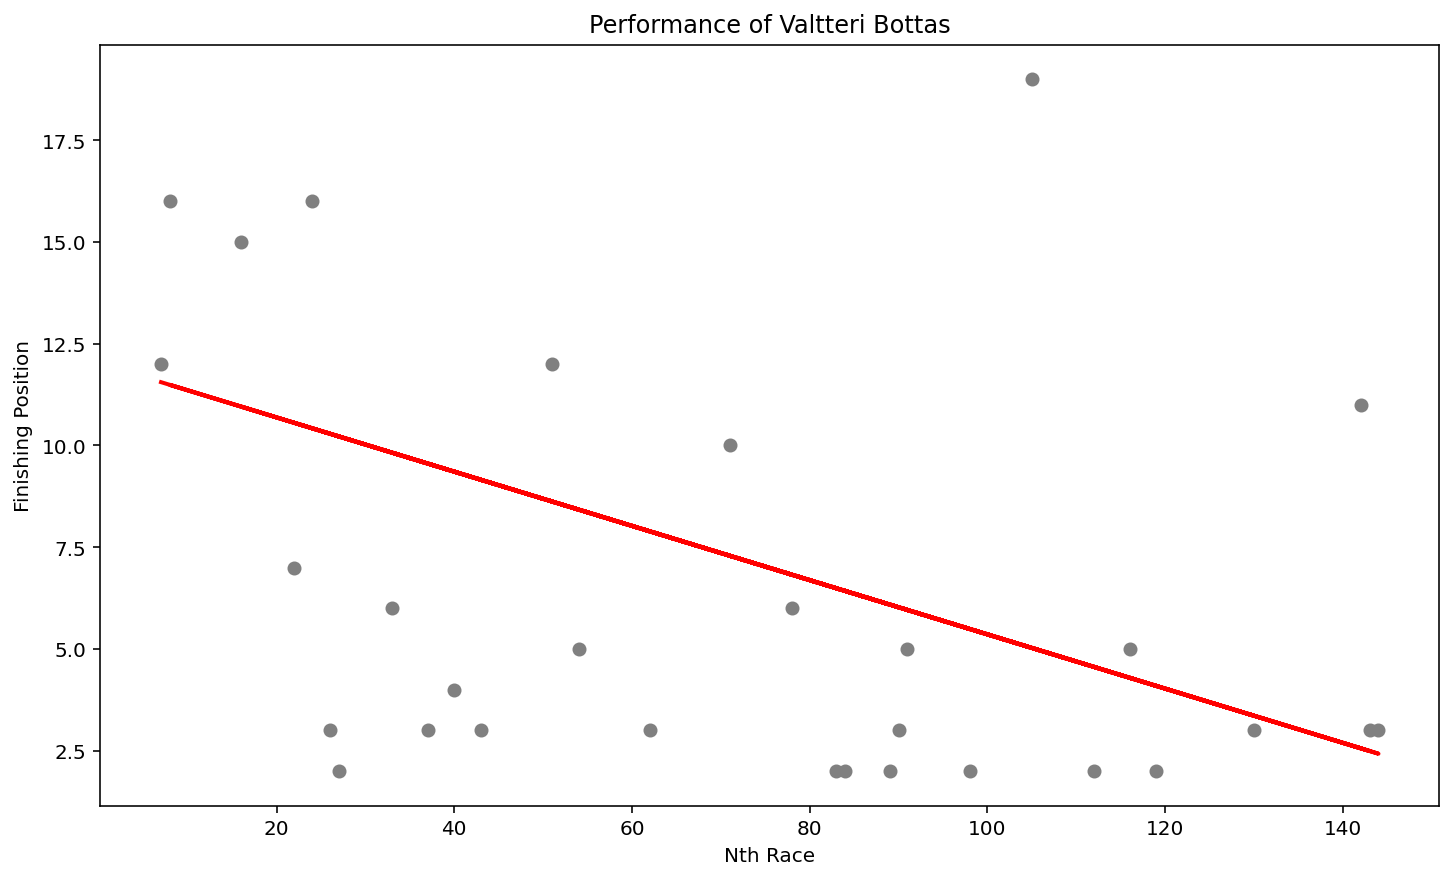

In [13]:
dfBOT = pd.DataFrame()
dfBOT['race'] = race
dfBOT['bot'] = bot
X = dfBOT['race'].values.reshape(-1,1)
y = dfBOT['bot'].values.reshape(-1,1)

plt.plot(X,y,'bo')
plt.ylabel('Position')
plt.xlabel('Races')
plt.legend(['Valtteri Bottas'])
plt.title('Valtteri Bottas vs Races')
plt.grid()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#intercept
print(regressor.intercept_)

#slope
print(regressor.coef_)

y_pred = regressor.predict(X_test)

dfBOTPred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Nth Race')
plt.ylabel('Finishing Position')
plt.title('Performance of Valtteri Bottas')
plt.show()

Having created a Linear Regressed Model, we see the line of best fit generated by the model.

$$(Finishing Position Bottas) = -0.06664188(Nth Race) + 12.02118485$$

In the next part, we'll take a closer look at how we can use this data to identify performance trends, compare them, use this model to predict future performance, and see how bias can adversely affect this model.

Sources:

https://www.brookings.edu/research/algorithmic-bias-detection-and-mitigation-best-practices-and-policies-to-reduce-consumer-harms/ 

https://www.nbcsports.com/video/valtteri-bottas-allows-lewis-hamilton-pass-him-hungarian-grand-prix

https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html